# Meta-Heuríticas : Trabalho Prático 1 

- Aymê Faustino dos Santos - 4704
- Pedro Augusto Martins Pereira - 4692
- Henrique Alves Campos - 4231

O trabalho consiste em implementar duas meta-heuríticas para minimizar duas funções objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [18]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Funções Objetivo 

### 1.1 Representação da Solução

Vamos utilizar um vetor para representar as variáveis de decisão. Na função objetivo 1 ele terá tamanho dois pois temos duas variaveis de decisão poŕem na função objetivo 2 temos quatro variaveis de decisão sendo assim ele terá tamanho quatro.

### 1.2 Função Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [19]:
def funcao_objetivo_01(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

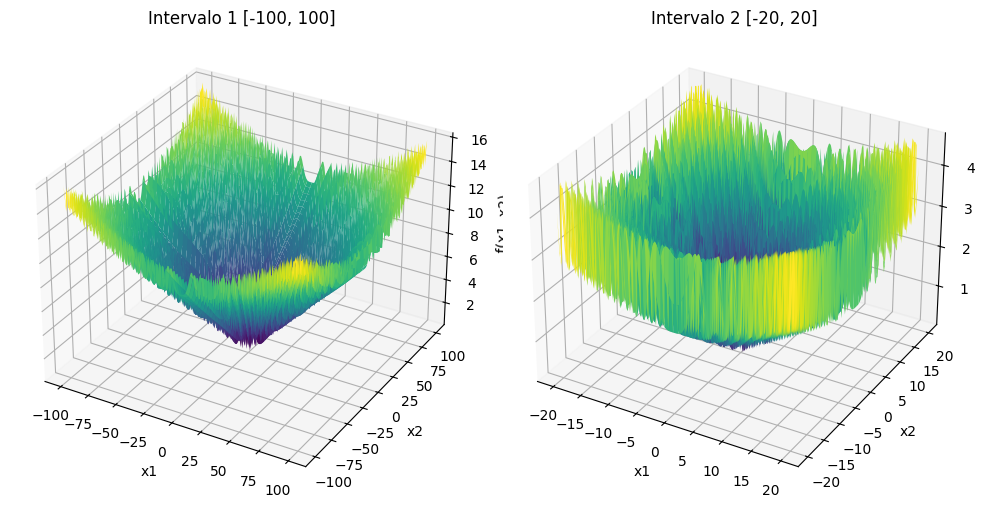

In [20]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(10, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_01([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo 1 [-100, 100]', 'Intervalo 2 [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Função Objetivo 2

1.3.1 Intervalos

a)−10 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 10

b)−2 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 2

In [21]:
def funcao_objetivo_02(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

Como a função f(x) depende de quatro variáveis, foi necessário fixar x₃ e x₄ para permitir a visualização em 3D. Assim, foi possível analisar o comportamento da função variando apenas x₁ e x₂.

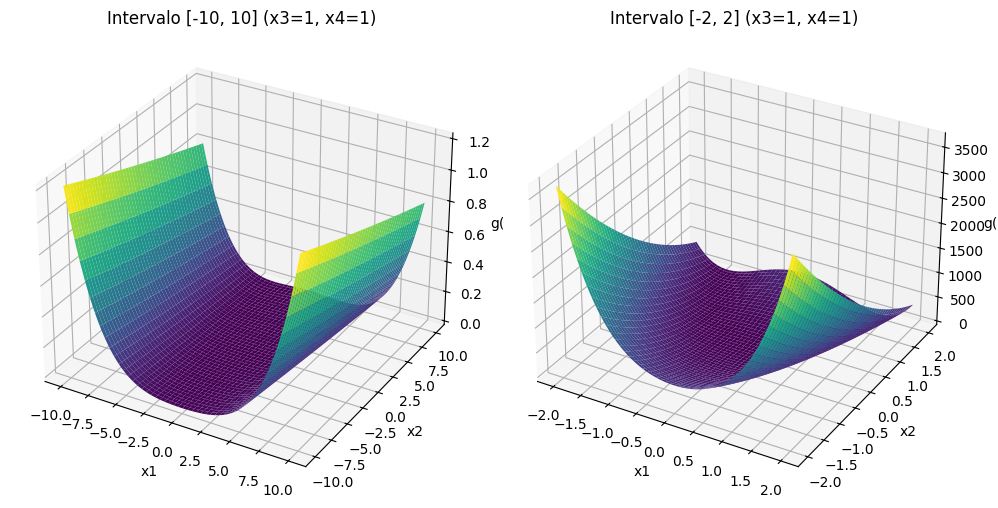

In [22]:
def plotar_superficies_2(intervalos, titulos, x3=1, x4=1):
    fig = plt.figure(figsize=(10, 5))

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_02([x_, y_, x3, x4]) for x_, y_ in zip(x_row, y_row)]
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(f"{titulo} (x3={x3}, x4={x4})")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('g(x)')

    plt.tight_layout()
    plt.show()

intervalo2_a = (-10, 10)
intervalo2_b = (-2, 2)
titulos = ["Intervalo [-10, 10]", "Intervalo [-2, 2]"]

plotar_superficies_2([intervalo2_a, intervalo2_b], titulos)

## 2. Meta-Heuristicas

Para minimiziar as funções objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decisões precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) é uma metaheurística baseada na exploração sistemática de diferentes vizinhanças para encontrar a solução ótima de um problema. A principal motivação do VNS é evitar ficar preso em ótimos locais, expandindo a busca para outras regiões do espaço de soluções.

Ele se baseia na seguinte ideia:
- Se uma solução é um ótimo local em uma vizinhança, ela pode não ser em outra.
- Alternar entre diferentes vizinhanças ajuda a escapar de ótimos locais e encontrar melhores soluções.

VNS é eficiente, simples e versátil, sendo utilizado em problemas de otimização combinatória e contínua.

#### 2.1.1 Pseudocódigo do VNS Básico

Entrada: solução inicial `x`, número máximo de vizinhanças `k_max`, número máximo de iterações

1. x_best ← x

2. Para t = 1 até max_iter faça:

    3. k ← 1

    4. Enquanto k ≤ k_max faça:

        5.   Gerar x' na k-ésima vizinhança de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ← x''

        9.       k ← 1   // reinicia vizinhança

        10.  Senão:

        11.      k ← k + 1
        
12. Retornar x_best



Decisões importantes na implementação do VNS

- Solução Inicial
- Estrutura de Vizinhança
- Condições de Parada
- Estratégia de Busca Local
- Quantidade de vizinhanças (k_max)

### 2.1.2 Solução Inicial

Como a solução será representada por meio de um vetor, uma estratégia simples e muito utilizada na inicialização é a de gerar uma solução aleatória preenchendo as posições do vetor com valores que estejam dentro de um intervalo pré definido para cada variável.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing é um método de busca local que usa um procedimento de melhora iterativa, ou seja, a cada iteração ele tenta melhorar a solução corrente sendo portanto um algoritmo gulosa que não aceita piora. Seu algorimo para problemas de minimização é:

```
s --> solução candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturbação pequena na solução corrente para encontrar um nova solução
    se qualidade(r)<qualidade(s) então --> compara o valor da função objetivo na nova solução com o da solução corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se não melhora não faz nada
até condição de parada
retorne s
```

Analisando o algoritmo é preciso definir:
* Como obter solução Inicial
* Como pertubarr uma solução
* Condição de Parada

#### Solução Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solução canditada vai ser definida no VNS.

#### Perturbar Solução

O algoritmo Hill Climbing realiza pequenas perturbações na solução corrente, adicionando um valor aleatório, chamado de ruído, em cada variável de decisão. O desafio é controlar o tamanho da perturbação para que ela seja pequena o suficiente para não causar grandes variações, mas suficiente para explorar o espaço de soluções. Uma estratégia possível é limitar o ruído a um valor proporcional à solução atual, utilizando uma porcentagem dentro de um intervalo especificado.

Será utilizado um algoritmo que recebe o intervalo da porcentagem do ruído como parâmetro e escolhe aleatoriamente um valor dentro desse intervalo para cada variável de decisão. Isso permite que o método seja flexível e possa ser utilizado para perturbações de diferentes magnitudes, dependendo da configuração. O pseudocódigo do algoritmo é o seguinte:

```
min = valor mínimo desejado para cada elemento do vetor
max = valor máximo desejado para cada elemento do vetor

min_ruido = porcentagem mínima do ruído
max_ruido = porcentagem máxima do ruído

v = quantidade de variáveis de decisão
vetor[v] = solução a ser perturbada

for i de 1 até v faça --> para cada elemento do vetor de variáveis
    ruido = número aleatório [min_ruido, max_ruido]
    perturbacao = vetor[i] + ruido * (número aleatório [min[i], max[i]] - vetor[i])

    se perturbacao < min[i] ou perturbacao > max[i] então
        enquanto perturbacao < min[i] ou perturbacao > max[i] faça
            ruido = número aleatório [min_ruido, max_ruido]
            perturbacao = vetor[i] + ruido * (número aleatório [min[i], max[i]] - vetor[i])
    
    adicionar perturbacao ao vetor

retornar vetor como array numpy

```

Para as pequenas pertubações vamos utilizar um ruido de 3% a 5%

#### Condição de parada

Existem várias estratégias que podem ser adotadas como condição de parada, como:
* certa quantidade de iterações realizadas
* certa quantidade de avaliações da função objetivo realizadas
* limite de tempo gasto
* certo número de iterações sme melhoria da solução atual

Na implementação do Hill Climbing o critério de parada será realizar 5 iterações sem melhoria da solução atual 

### 2.1.4 Gerar solução inicial aleatoria

In [23]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertubações 

In [24]:
def pertubacao(solucao, min, max, min_ruido, max_ruido, qtdVariaveisDecisao):
    nova_solucao = []
    for i in range(qtdVariaveisDecisao):
        ruido = random.uniform(min_ruido, max_ruido)
        perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Checagem das restrições
        if perturbacao < min[i] or perturbacao > max[i]:
            # Caso a perturbação saia dos limites, tentamos gerar outra perturbação
            # ou ajustamos para dentro dos limites
            while perturbacao < min[i] or perturbacao > max[i]:
                ruido = random.uniform(min_ruido, max_ruido)
                perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Adiciona a perturbação à nova solução
        nova_solucao.append(perturbacao)
    
    return np.array(nova_solucao)


### 2.1.6 Hill Climbing 

In [25]:
def hillClimbing(solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao, max_iter=100):
    min_ruido = 0.05  # pode até aumentar esse ruído
    max_ruido = 0.1
    semMudanca = 0
    iter_count = 0

    while semMudanca < 5 and iter_count < max_iter:
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido, qtdVariaveisDecisao)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao):
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
        
        iter_count += 1

    return solucao


### 2.1.7 VNS

In [26]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)

    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iter_total = 0

    while iter_total < max_iter:
        k = 1
        while k <= k_max:
            # Perturbação: nova solução na vizinhança k
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = np.clip(nova_solucao, min, max)
            
            # Busca local (hill climbing)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                # Aceita e reinicia vizinhança
                melhor_solucao = nova_solucao
                melhor_valor = valor_nova_solucao
                solucao_corrente = nova_solucao
                k = 1
            else:
                # Não melhorou: avança para próxima vizinhança
                k += 1

        iter_total += 1

    return melhor_solucao



#### Função Auxiliar Para Plotar um Gráfico com o Valor Final da Função Objetivo em cada Iteração

In [27]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # Índice do melhor valor (mínimo)

    # Plotar a curva dos valores da função objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')

    for i in range(len(valores[target])):
        # Ponto atual
        y = valores[target][i]

        # Coleta os valores das variáveis (x1, x2, x3, ..., xn)
        texto_variaveis = '\n'.join([f'{var} = {valores[var][i]:.4f}' for var in valores if var != target])

        if i == min_index:
            # Destaca o melhor valor
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, y, texto_variaveis, fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Pontos normais
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=8, ha='center', va='center', color='black')

    # Configurações visuais
    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execuções')
    plt.ylabel('Valor da função objetivo')
    plt.title(f'Valor Final da Função Objetivo em cada Execução do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Intervalo 1A

In [28]:
vns_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_intervalo = intervalo1_a[0]
max_intervalo = intervalo1_a[1]

# Rodando o algoritmo VNS 30 vezes com diferentes quantidades de variáveis de decisão
for i in range(30):
    # Aqui você pode definir dinamicamente a quantidade de variáveis de decisão
    qtdVariaveisDecisao = 2
    
    solucao = vns(funcao_objetivo_01, [min_intervalo] * qtdVariaveisDecisao, [max_intervalo] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1a['x1'].append(solucao[0])  
    vns_1a['x2'].append(solucao[1]) 
    vns_1a['f(x1,x2)'].append(funcao_objetivo_01(solucao))  
    

print(vns_1a)


{'x1': [np.float64(-0.03189495409998677), np.float64(0.008357446245164324), np.float64(-0.017996931363999602), np.float64(0.0010765683930140102), np.float64(0.007070130269592578), np.float64(0.010626578698747613), np.float64(0.015402714702407616), np.float64(-0.8539509999390509), np.float64(-0.036191469947109756), np.float64(0.0056054800745757305), np.float64(0.022592270709166362), np.float64(0.028936955909655504), np.float64(0.011496868864157461), np.float64(-0.9936960607207268), np.float64(-0.0031791268161049935), np.float64(0.03609699681226197), np.float64(-0.3308896071145506), np.float64(0.010275800019330372), np.float64(0.05088953877211999), np.float64(-0.010127678657435357), np.float64(-0.05251049829827492), np.float64(0.003616051605235482), np.float64(0.012978875839369408), np.float64(-0.649295237937415), np.float64(-0.009617256573217547), np.float64(-0.015315625194077379), np.float64(-0.013693638665602803), np.float64(-0.009287599195102914), np.float64(-0.0127969862346069), np.

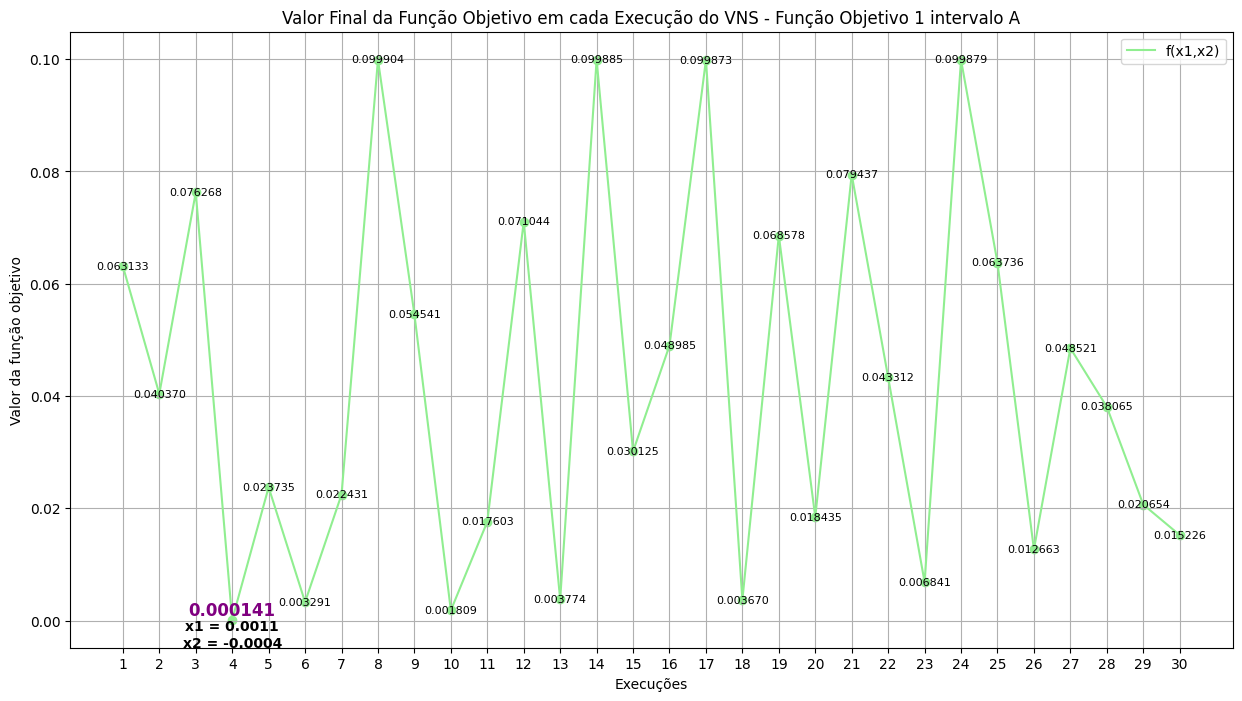

In [29]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo A')

#### Intervalo 1B

In [30]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1]

qtdVariaveisDecisao = 2

for i in range(30):    
    # Chamada ao algoritmo VNS com a quantidade de variáveis de decisão
    solucao = vns(funcao_objetivo_01, [min] * qtdVariaveisDecisao, [max] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1b['x1'].append(solucao[0]) 
    vns_1b['x2'].append(solucao[1])  
    vns_1b['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da função objetivo
    

print(vns_1b)

{'x1': [np.float64(-0.011248079599846403), np.float64(-0.0016413555418186565), np.float64(-0.007574858726422273), np.float64(0.01617020337988484), np.float64(-2.0766738707989063e-05), np.float64(0.01060724744007191), np.float64(0.027568640987347348), np.float64(-0.005462734655598711), np.float64(-0.019846032199556274), np.float64(0.008983400927884855), np.float64(-0.002289156527623293), np.float64(0.0079557529329769), np.float64(0.0023044614134197783), np.float64(0.009226718546027302), np.float64(0.041822895727867904), np.float64(0.014595762412064062), np.float64(0.015495488557603743), np.float64(0.011257761163283142), np.float64(-0.03361233852129564), np.float64(-0.017620011555401216), np.float64(-0.0033683565348342492), np.float64(-0.012462204961592338), np.float64(0.016453903044896176), np.float64(0.012994502086886073), np.float64(0.004840550850345293), np.float64(-0.013303005193502249), np.float64(-0.0089496231352299), np.float64(-0.021392034581079744), np.float64(0.004096362763663

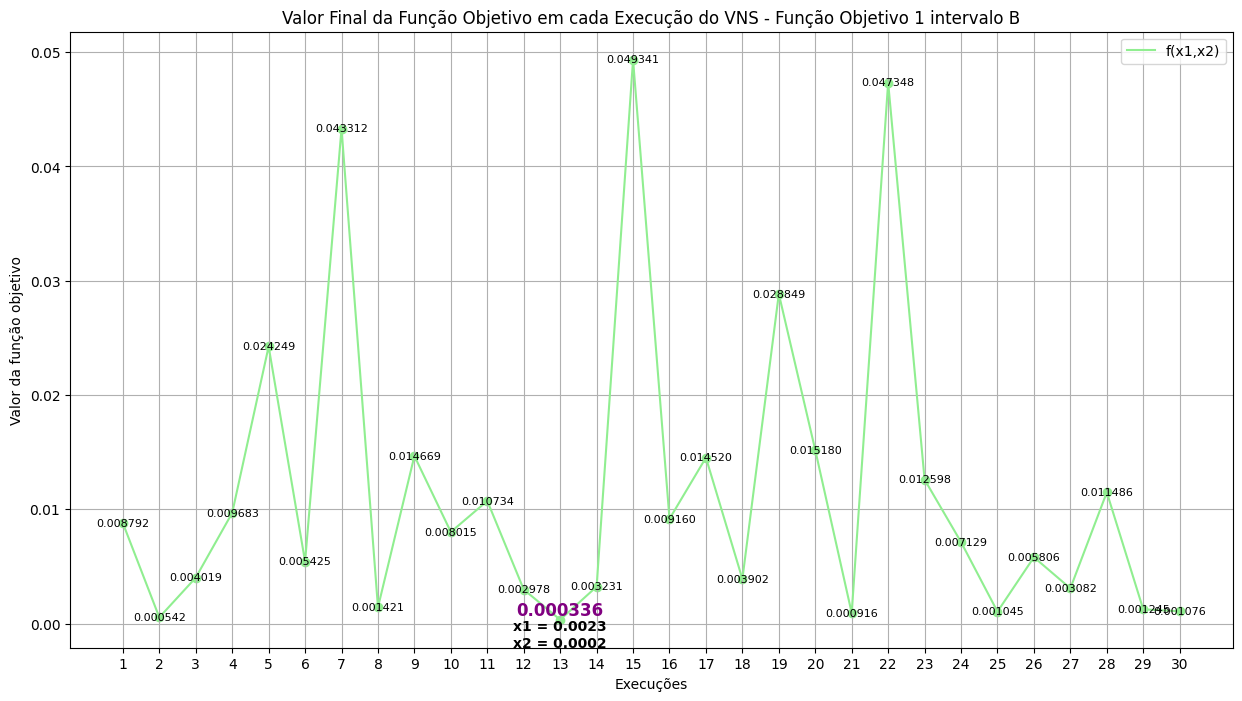

In [31]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo B')

#### Intervalo 2A

In [32]:
vns_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]  
max_2a = intervalo2_a[1]

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de variáveis de decisão definida como 4
    solucao = vns(funcao_objetivo_02, [min_2a]* qtdVariaveisDecisao, [max_2a]* qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicionário
    vns_2a['x1'].append(solucao[0])
    vns_2a['x2'].append(solucao[1])
    vns_2a['x3'].append(solucao[2])
    vns_2a['x4'].append(solucao[3])
    vns_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2a)


{'x1': [np.float64(1.34945882283588), np.float64(0.7371032552061738), np.float64(1.332372884442577), np.float64(0.9424607589619469), np.float64(0.925216226275121), np.float64(0.9310989668272274), np.float64(1.0316410046528852), np.float64(1.3944240935176686), np.float64(0.8801983166171414), np.float64(0.9800028906445706), np.float64(0.922722114450607), np.float64(0.2463865384124282), np.float64(0.5333668651847404), np.float64(1.1563894235412218), np.float64(0.614013098556195), np.float64(1.002994902511495), np.float64(0.8020970393572217), np.float64(0.47503034542560585), np.float64(1.3105976605518292), np.float64(1.0073667179113313), np.float64(1.295151543254124), np.float64(0.7020294402095919), np.float64(0.8497936912019899), np.float64(1.0331620400144443), np.float64(1.1779775050117196), np.float64(1.0511242835616017), np.float64(0.8907686541903304), np.float64(0.7579248307551244), np.float64(1.2980218349279673), np.float64(1.3591467314319943)], 'x2': [np.float64(1.7776565316293347),

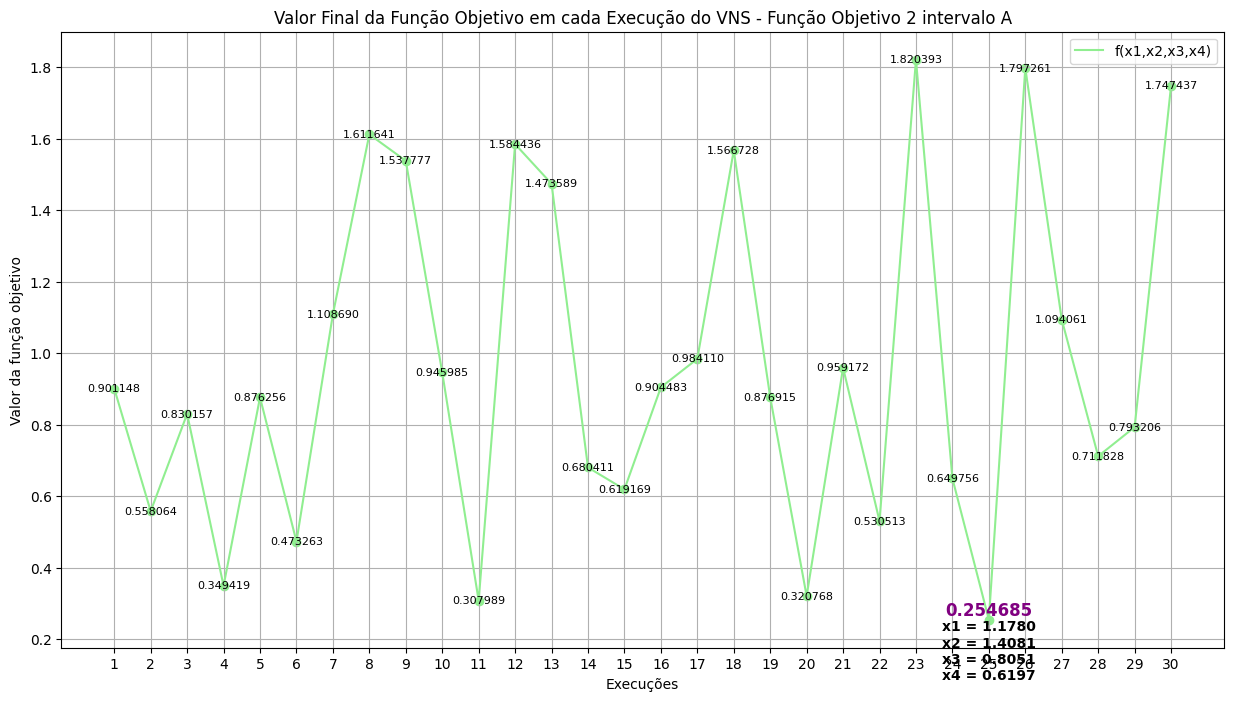

In [33]:
objetivoFinalCadaIteracao(vns_2a, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo A')


#### Intervalo 2B

In [34]:
vns_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]  
max_2b = intervalo2_b[1] 

qtdVariaveisDecisao=4

for i in range(30):
    solucao = vns(funcao_objetivo_02, [min_2b]*qtdVariaveisDecisao, [max_2b]*qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_2b['x1'].append(solucao[0])
    vns_2b['x2'].append(solucao[1])
    vns_2b['x3'].append(solucao[2])
    vns_2b['x4'].append(solucao[3])
    vns_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2b)


{'x1': [np.float64(1.0422453778536056), np.float64(0.5032071384146494), np.float64(0.9846217568520703), np.float64(0.825878465529384), np.float64(1.037598810361557), np.float64(0.96861143775199), np.float64(0.9460383293114948), np.float64(0.8835981964859511), np.float64(1.006813094449791), np.float64(0.977114895936357), np.float64(1.1017608764256506), np.float64(1.076142137011929), np.float64(0.8662954840947111), np.float64(1.276247712154174), np.float64(0.8838865347991376), np.float64(0.43872954508030215), np.float64(1.1762669896051), np.float64(1.1480299564019407), np.float64(0.7401468829897311), np.float64(1.0333701315385044), np.float64(1.0701612460646805), np.float64(0.8345763385867473), np.float64(0.9178067783793824), np.float64(0.9889022482608576), np.float64(0.9917253352092351), np.float64(1.2038656020748029), np.float64(0.9946285977752858), np.float64(0.9791722591422332), np.float64(-0.9836655584977441), np.float64(0.9191747082074135)], 'x2': [np.float64(1.0676194359882616), n

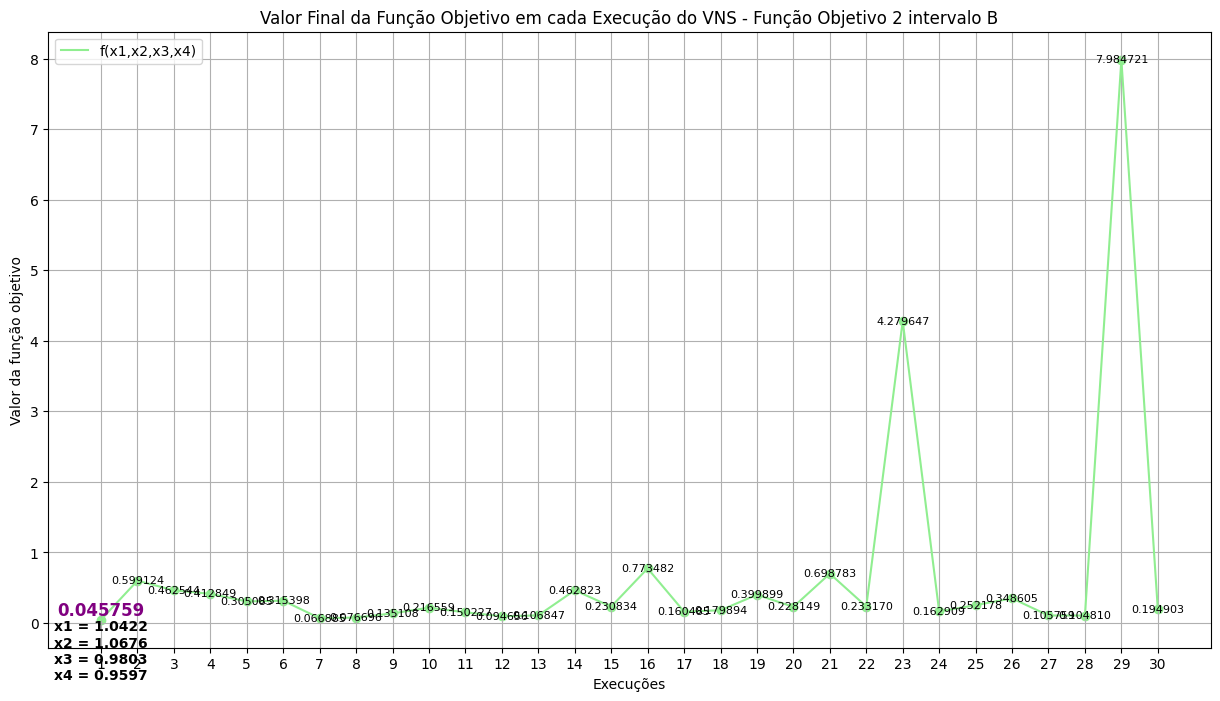

In [35]:
objetivoFinalCadaIteracao(vns_2b, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo B')

#### Função para exibir o boxplot

In [36]:
def exibirBoxplot(resultadosComparar, titulo, cor):
    fig, ax = plt.subplots(figsize=(6, 4))

    sns.boxplot(y=resultadosComparar, ax=ax, color=cor)

    ax.set_title('VNS', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valor da Função Objetivo', fontsize=10)

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.show()


    """def exibirBoxplot(resultadosComparar, titulo, cor):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(y=resultadosComparar[0], ax=ax1, color=cor)
    sns.boxplot(y=resultadosComparar[1], ax=ax2, color=cor)

    ax1.set_title('SA', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Função Objetivo', fontsize=10)
    ax2.set_title('ILS', fontsize=10, fontweight='bold')
    
    fig.suptitle(titulo, fontsize=10, fontweight='bold')

    plt.show()"""

#### Função para gerar as estatisticas

In [37]:
def estatisticas(resultadosComparar, nome_funcao_objetivo):
    estatisticas = {'algoritmo': [], 'minimo': [], 'maximo': [], 'media': [], 'dp': [], 'x_do_minimo': [], 'y_do_minimo': []}
   
    algoritmos = ['VNS']  # Aqui só tem VNS, mas depois adicione SA se necessário

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)
        estatisticas['x_do_minimo'].append(resultado['x1'][indice_minimo])  # Para x1
        estatisticas['y_do_minimo'].append(resultado['x2'][indice_minimo])  # Para x2
    
    return pd.DataFrame(estatisticas)

Estatísticas VNS 1A
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.000141  0.099904  0.042531  0.032548     0.001077    -0.000399 

Estatísticas VNS 1B
  algoritmo    minimo    maximo    media        dp  x_do_minimo  y_do_minimo
0       VNS  0.000336  0.049341  0.01167  0.013478     0.002304     0.000158 

Estatísticas VNS 2A
  algoritmo    minimo    maximo    media        dp  x_do_minimo  y_do_minimo
0       VNS  0.254685  1.820393  0.96231  0.468564     1.177978     1.408085 

Estatísticas VNS 2B
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.045759  7.984721  0.659626  1.549459     1.042245     1.067619


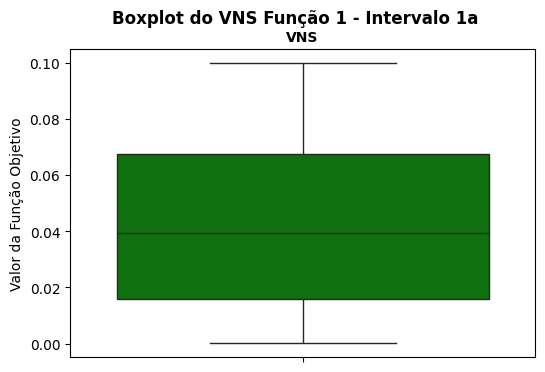

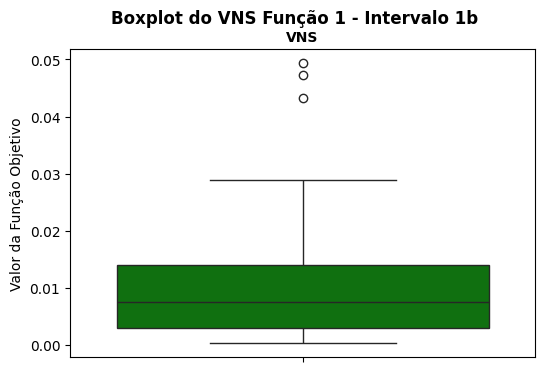

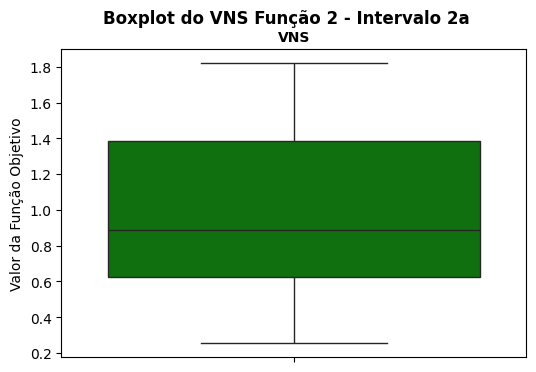

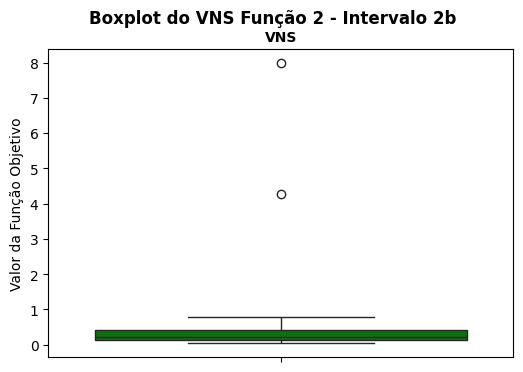

In [38]:
# Calcular as estatísticas para o VNS e o SA posteriormente
estatisticas_vns1a = estatisticas([vns_1a], 'f(x1,x2)')
print("Estatísticas VNS 1A")
print(estatisticas_vns1a, "\n")

print("Estatísticas VNS 1B")
estatisticas_vns1b = estatisticas([vns_1b], 'f(x1,x2)')
print(estatisticas_vns1b, "\n")

print("Estatísticas VNS 2A")
estatisticas_vns2a = estatisticas([vns_2a], 'f(x1,x2,x3,x4)')
print(estatisticas_vns2a, "\n")

print("Estatísticas VNS 2B")
estatisticas_vns2b = estatisticas([vns_2b], 'f(x1,x2,x3,x4)')
print(estatisticas_vns2b)
#resultadosComparar 
exibirBoxplot(vns_1a['f(x1,x2)'], 'Boxplot do VNS Função 1 - Intervalo 1a', 'green')
exibirBoxplot(vns_1b['f(x1,x2)'], 'Boxplot do VNS Função 1 - Intervalo 1b', 'green')
exibirBoxplot(vns_2a['f(x1,x2,x3,x4)'], 'Boxplot do VNS Função 2 - Intervalo 2a', 'green')
exibirBoxplot(vns_2b['f(x1,x2,x3,x4)'], 'Boxplot do VNS Função 2 - Intervalo 2b', 'green')

### 2.2 Simulated Annealing (SA)

#### 2.2.1. Conceito do Algoritmo

O **Simulated Annealing** é inspirado no processo de recozimento em metalurgia:

1- **Temperatura alta** → Aceita soluções piores (exploração).

2- **Temperatura baixa** → Aceita apenas melhoras (exploitation).

3- **Resfriamento gradual** → Reduz a temperatura ao longo do tempo.

#### 2.2.2 Passos do algorítmo

```python
# 1. INICIALIZAÇÃO
x_atual ← SOLUÇÃO_ALEATÓRIA(limites, dimensao)  # Gera solução inicial
f_atual ← funcao_objetivo(x_atual)
T ← 1000                                        # Temperatura inicial
alpha ← 0.95                                    # Taxa de resfriamento
historico_melhores ← [f_atual]                  # Armazena histórico

# 2. LOOP TERMAL PRINCIPAL
ENQUANTO T > 0.01 FAÇA:
    PARA i DE 1 ATÉ 100 FAÇA:                   # Iterações por temperatura
        
        # 2.1 GERAÇÃO DE VIZINHO
        x_vizinho ← PERTURBA(x_atual, limites)
        f_vizinho ← funcao_objetivo(x_vizinho)
        delta ← f_vizinho - f_atual
        
        # 2.2 CRITÉRIO DE ACEITAÇÃO
        SE delta < 0 OU rand() < exp(-delta/T) ENTÃO:
            x_atual ← x_vizinho                 # Atualiza solução
            f_atual ← f_vizinho
            
            # 2.3 ATUALIZA MELHOR SOLUÇÃO
            SE f_atual < MIN(historico_melhores):
                melhor_x ← x_atual
                melhor_f ← f_atual
    
    # 2.4 RESFRIAMENTO
    T ← T * alpha                               # Reduz temperatura
    historico_melhores.APPEND(f_atual)          # Registra progresso

RETORNE melhor_x, melhor_f                      # Solução final

#### 2.2.3 Implementação em Python

##### 2.2.3.1 Classe do Simulated Annealing

In [39]:
class SimulatedAnnealing:
    def __init__(self, dimensao, limites, funcao_objetivo):
        self.d = dimensao
        self.limite_inf = limites[0]
        self.limite_sup = limites[1]
        self.funcao_objetivo = funcao_objetivo
    
    def solucao_inicial(self):
        return np.random.uniform(self.limite_inf, self.limite_sup, self.d)
    
    def gerar_vizinho(self, x_atual, passo_max):
        perturbacao = np.random.uniform(-passo_max, passo_max, self.d)
        x_vizinho = x_atual + perturbacao
        return np.clip(x_vizinho, self.limite_inf, self.limite_sup)
    
    def executar(self, n_execucoes = 30, T_inicial = 1000, T_final = 0.01, alpha = 0.95, iteracoes_T = 150, passo_max = None):
        if passo_max is None:
            passo_max = (self.limite_sup - self.limite_inf) * 0.1 # Usa 10% como o padrão
        
        resultados = []
        melhores_x = []
        
        for _ in range(n_execucoes):
            x_atual = self.solucao_inicial()
            f_atual = self.funcao_objetivo(x_atual)
            T = T_inicial
            melhor_x = x_atual.copy()
            melhor_f = f_atual
            
            while T > T_final:
                for _ in range(iteracoes_T):
                    x_vizinho = self.gerar_vizinho(x_atual, passo_max)
                    f_vizinho = self.funcao_objetivo(x_vizinho)
                    
                    delta_f = f_vizinho - f_atual
                    
                    if delta_f < 0 or np.random.random() < math.exp(-delta_f / T):
                        x_atual, f_atual = x_vizinho, f_vizinho
                        
                        if f_atual < melhor_f:
                            melhor_f = f_atual
                            melhor_x = x_atual.copy()
                
                T *= alpha  # Resfriamento
            
            resultados.append(melhor_f)
            melhores_x.append(melhor_x)
        
        return {
            'resultados': np.array(resultados),
            'melhores_x': np.array(melhores_x),
            'media': np.mean(resultados),
            'minimo': np.min(resultados),
            'maximo': np.max(resultados),
            'desvio': np.std(resultados)
        }

#### 2.2.4 Execução para Todos os Problemas

##### 2.2.4.1 Configuração dos Problemas

In [40]:
problemas = [
    {'nome': '1 a) d = 2 [-100,100]', 'd': 2, 'limites': (-100, 100)},
    {'nome': '1 b) d = 2 [-20,20]', 'd': 2, 'limites': (-20, 20)},
    {'nome': '2 c) d = 4 [-10,10]', 'd': 4, 'limites': (-10, 10)},
    {'nome': '2 d) d = 4 [-2,2]', 'd': 4, 'limites': (-2, 2)}
]

##### 2.2.4.2 Execução e Análise


 === 1 a) d = 2 [-100,100] ===
Média: 0.096828
Mínimo: 0.028115
Máximo: 0.154187
Desvio padrão: 0.023304
Melhor x encontrado: [-0.02953696 -0.01943994]


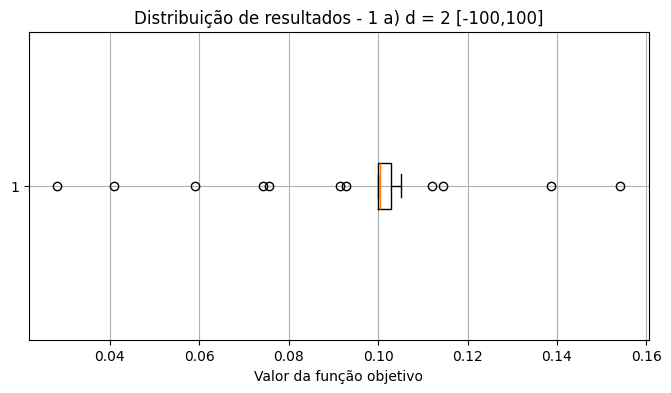


 === 1 b) d = 2 [-20,20] ===
Média: 0.024928
Mínimo: 0.002071
Máximo: 0.093436
Desvio padrão: 0.021145
Melhor x encontrado: [ 0.00010706 -0.00801837]


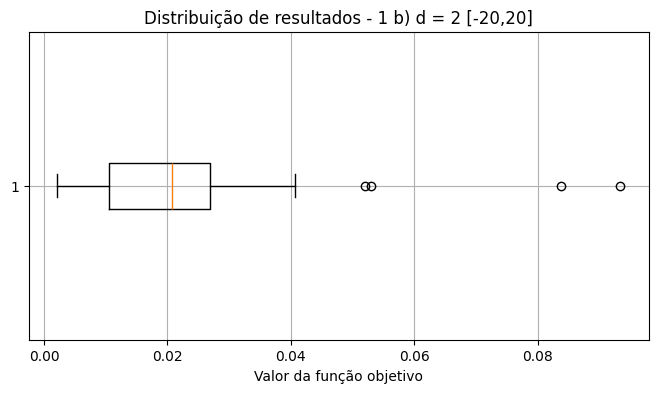


 === 2 c) d = 4 [-10,10] ===
Média: 0.099925
Mínimo: 0.099873
Máximo: 0.100275
Desvio padrão: 0.000083
Melhor x encontrado: [-0.77760616 -0.50800472  0.25044377  0.26347702]


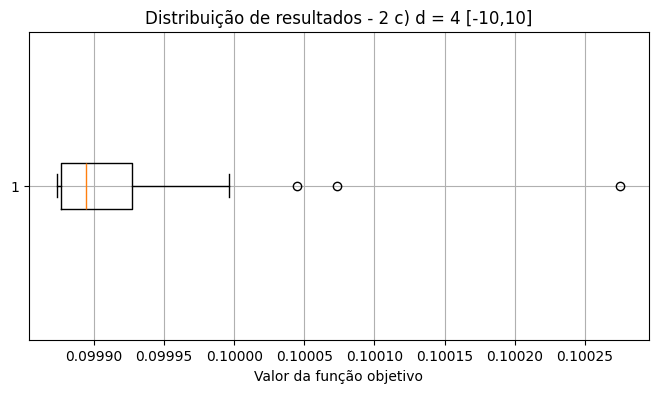


 === 2 d) d = 4 [-2,2] ===
Média: 0.099876
Mínimo: 0.099873
Máximo: 0.099926
Desvio padrão: 0.000010
Melhor x encontrado: [-0.59427343  0.75422377  0.22712899 -0.14610968]


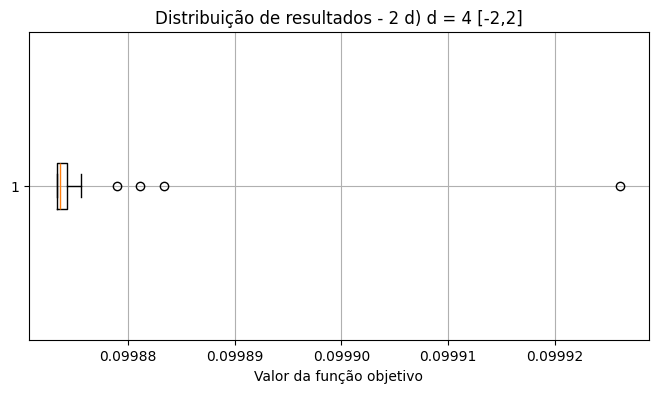

In [41]:
n_execucoes = 30
T_inicial = 1000

for problema in problemas:
    print(f"\n === {problema['nome']} ===")
    
    # Ajuste automático de parâmetros
    intervalo = problema['limites'][1] - problema['limites'][0]
    passo_max = intervalo * 0.1  # Passo inicial = 10% do intervalo

    # Define qual função objetivo usar
    funcao = funcao_objetivo_01 if problema['d'] == 2 else funcao_objetivo_01

    # Executa SA
    sa = SimulatedAnnealing(
        dimensao = problema['d'],
        limites = problema['limites'],
        funcao_objetivo = funcao
    )
    
    resultado = sa.executar(
        n_execucoes = n_execucoes,
        T_inicial = T_inicial,
        passo_max = passo_max
    )
    
    valores_objetivo = resultado['resultados']
    melhores_x = resultado['melhores_x']
    
    # Estatísticas
    media = resultado['media']
    minimo = resultado['minimo']
    maximo = resultado['maximo']
    desvio = resultado['desvio']
    melhor_x_global = melhores_x[np.argmin(valores_objetivo)]

    # Exibição dos resultados
    print(f"Média: {media:.6f}")
    print(f"Mínimo: {minimo:.6f}")
    print(f"Máximo: {maximo:.6f}")
    print(f"Desvio padrão: {desvio:.6f}")
    print(f"Melhor x encontrado: {melhor_x_global}")
    
    # Boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(valores_objetivo, vert=False)
    plt.title(f"Distribuição de resultados - {problema['nome']}")
    plt.xlabel("Valor da função objetivo")
    plt.grid(True)
    plt.show()
